In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import load_breast_cancer, make_circles, make_classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models, Input
from tensorflow.keras.datasets import imdb, mnist, reuters
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from keras.optimizers import SGD
from keras.utils import plot_model
from keras.models import load_model

2023-12-19 10:30:07.652145: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 10:30:07.710173: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 10:30:07.710217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 10:30:07.711859: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 10:30:07.720613: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 10:30:07.721675: I tensorflow/core/platform/cpu_feature_guard.cc:1

# Problema multiclase
Hasta ahora, nos hemos centrado en problemas de clasificación binaria, pero la esencia de abordar problemas de clasificación multiclase sigue la misma lógica fundamental.

En este nuevo contexto, vamos a introducir el conjunto de datos MNIST, una base de datos icónica en el campo del aprendizaje profundo. MNIST consiste en un conjunto de imágenes de dígitos escritos a mano, del 0 al 9. Cada imagen tiene una resolución de 28x28 píxeles, y el objetivo es asignar a cada imagen el dígito que representa. Este conjunto de datos ha servido como punto de partida para muchos desarrolladores y científicos de datos al explorar y desarrollar algoritmos de clasificación de imágenes. La versatilidad de MNIST radica en su simplicidad, pero también en la riqueza de los desafíos que presenta, ya que las imágenes varían en términos de escritura, estilo y orientación.

Comienza cargando el conjunto de datos y obteniendo subconjuntos de las imágenes:

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalizar el formato de las imágenes
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

# Conjuntos de imágenes
validation_images = train_images[2000 : 2100]
validation_labels = train_labels[2000 : 2100]
train_images = train_images[0 : 500]
train_labels = train_labels[0 : 500]
test_images = test_images[0 : 500]
test_labels = test_labels[0 : 500]

Podemos visualizar estas imágenes haciendo:

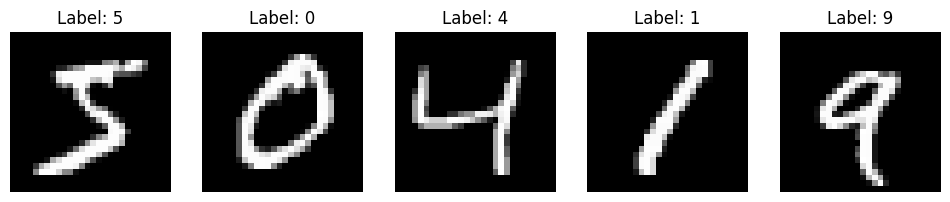

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3 0 2 9
 3 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2 8 5 8 6
 7 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4 6 4 9 7 0 9 2 9 5 1 5 9 1 2 3 2 3 5 9 1
 7 6 2 8 2 2 5 0 7 4 9 7 8 3 2 1 1 8 3 6 1 0 3 1 0 0 1 7 2 7 3 0 4 6 5 2 6
 4 7 1 8 9 9 3 0 7 1 0 2 0 3 5 4 6 5 8 6 3 7 5 8 0 9 1 0 3 1 2 2 3 3 6 4 7
 5 0 6 2 7 9 8 5 9 2 1 1 4 4 5 6 4 1 2 5 3 9 3 9 0 5 9 6 5 7 4 1 3 4 0 4 8
 0 4 3 6 8 7 6 0 9 7 5 7 2 1 1 6 8 9 4 1 5 2 2 9 0 3 9 6 7 2 0 3 5 4 3 6 5
 8 9 5 4 7 4 2 7 3 4 8 9 1 9 2 8 7 9 1 8 7 4 1 3 1 1 0 2 3 9 4 9 2 1 6 8 4
 7 7 4 4 9 2 5 7 2 4 4 2 1 9 7 2 8 7 6 9 2 2 3 8 1 6 5 1 1 0 2 6 4 5 8 3 1
 5 1 9 2 7 4 4 4 8 1 5 8 9 5 6 7 9 9 3 7 0 9 0 6 6 2 3 9 0 7 5 4 8 0 9 4 1
 2 8 7 1 2 6 1 0 3 0 1 1 8 2 0 3 9 4 0 5 0 6 1 7 7 8 1 9 2 0 5 1 2 2 7 3 5
 4 9 7 1 8 3 9 6 0 3 1 1 

In [3]:
# Visualizar algunas de las imágenes
num_images_to_visualize = 5

plt.figure(figsize=(12, 3))

for i in range(num_images_to_visualize):
    plt.subplot(1, num_images_to_visualize, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()
print(train_labels)

Como vemos en las etiquetas, la etiqueta de cada imagen es el número que tiene escrito. Aunque podríamos trabajar directamente con estos valores, los modelos habitualmente esperan etiquetas en formato one-hot encoding para la clasificación multiclase.

Para ello, las etiquetas suelen ser representadas como enteros (por ejemplo, 0, 1, 2, ..., n-1) donde $n$ es el número de clases. Sin embargo, para entrenar un modelo de clasificación multiclase en Keras, es común convertir estas etiquetas enteras en una representación de one-hot encoding. La función `to_categorical` en Keras realiza esta conversión.

In [4]:
train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)
print(train_labels)
print(train_labels.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(500, 10)


## 🏋🏻 Ejercicio
Entrena dos redes neuronales para pronosticar el número escrito en las imágenes y compara sus resultados.

Recomendación: Utiliza como primera capa de la red

`Flatten(input_shape=(28, 28, 1))`

para aplanar los datos de entrada, en vez de utilizar directamente una capa densa.

In [5]:
# Para reproducir los resultados obtenidos
import tensorflow.keras as keras
keras.utils.set_random_seed(1)

model1 = Sequential()
# Definir el resto del modelo
model1.add(Flatten(input_shape=(28, 28, 1))) # Capa de entrada
model1.add(Dense(10, activation="softmax")) # Capa de salida

model2 = Sequential()
# Definir el resto del modelo
model2.add(Flatten(input_shape=(28, 28, 1)))# Capa de entrada
model2.add(Dense(8, activation="relu")) # Capa oculta con 8 neuronas
model2.add(Dense(10, activation="softmax")) # Capa de salida

# Compilamos los modelos, con función de pérdida categorical_crossentropy
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el primer modelo y medir el tiempo de ejecución
start_time = time.time()
history1 = model1.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(validation_images, validation_labels))
execution_time1 = time.time() - start_time

# Entrenar el segundo modelo y medir el tiempo de ejecución
start_time = time.time()
history2 = model2.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(validation_images, validation_labels))
execution_time2 = time.time() - start_time

# Evaluar los modelos en el conjunto de prueba
loss1, accuracy1 = model1.evaluate(test_images, test_labels, verbose=0)
loss2, accuracy2 = model2.evaluate(test_images, test_labels, verbose=0)

Epoch 1/20
8/8 [==============================] - 1s 37ms/step - loss: 2.1584 - accuracy: 0.2240 - val_loss: 1.9491 - val_accuracy: 0.3900
Epoch 2/20
8/8 [==============================] - 0s 8ms/step - loss: 1.8419 - accuracy: 0.5280 - val_loss: 1.7104 - val_accuracy: 0.5600
Epoch 3/20
8/8 [==============================] - 0s 8ms/step - loss: 1.5925 - accuracy: 0.6880 - val_loss: 1.5154 - val_accuracy: 0.6800
Epoch 4/20
8/8 [==============================] - 0s 8ms/step - loss: 1.3852 - accuracy: 0.7580 - val_loss: 1.3661 - val_accuracy: 0.6900
Epoch 5/20
8/8 [==============================] - 0s 9ms/step - loss: 1.2193 - accuracy: 0.7860 - val_loss: 1.2497 - val_accuracy: 0.6800
Epoch 6/20
8/8 [==============================] - 0s 8ms/step - loss: 1.0837 - accuracy: 0.8100 - val_loss: 1.1461 - val_accuracy: 0.7200
Epoch 7/20
8/8 [==============================] - 0s 8ms/step - loss: 0.9749 - accuracy: 0.8240 - val_loss: 1.0731 - val_accuracy: 0.7300
Epoch 8/20
8/8 [=================

Accuracy del Modelo 1 en el Conjunto de Pruebas: 0.7960000038146973
Pérdida del Modelo 1 en el Conjunto de Pruebas: 0.7896276712417603

Accuracy del Modelo 2 en el Conjunto de Pruebas: 0.5879999995231628
Pérdida del Modelo 2 en el Conjunto de Pruebas: 1.2502858638763428

Tiempo de Ejecución del Modelo 1: 2.016047239303589 segundos
Tiempo de Ejecución del Modelo 2: 1.9732129573822021 segundos



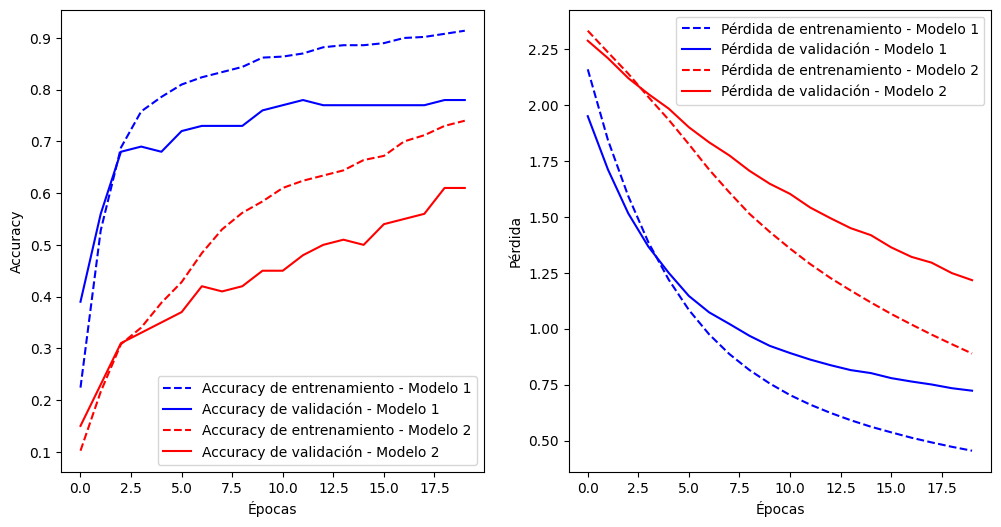

In [6]:
# Imprimir las Accuracy y Loss de los modelos
print(f'Accuracy del Modelo 1 en el Conjunto de Pruebas: {accuracy1}')
print(f'Pérdida del Modelo 1 en el Conjunto de Pruebas: {loss1}\n')
print(f'Accuracy del Modelo 2 en el Conjunto de Pruebas: {accuracy2}')
print(f'Pérdida del Modelo 2 en el Conjunto de Pruebas: {loss2}\n')

# Imprimir los tiempos de ejecución
print(f'Tiempo de Ejecución del Modelo 1: {execution_time1} segundos')
print(f'Tiempo de Ejecución del Modelo 2: {execution_time2} segundos\n')

# Graficar las historias de entrenamiento
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], c='b', linestyle='--', label='Accuracy de entrenamiento - Modelo 1')
plt.plot(history1.history['val_accuracy'], c='b', label='Accuracy de validación - Modelo 1')
plt.plot(history2.history['accuracy'], c='r', linestyle='--', label='Accuracy de entrenamiento - Modelo 2')
plt.plot(history2.history['val_accuracy'], c='r', label='Accuracy de validación - Modelo 2')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], c='b', linestyle='--', label='Pérdida de entrenamiento - Modelo 1')
plt.plot(history1.history['val_loss'], c='b', label='Pérdida de validación - Modelo 1')
plt.plot(history2.history['loss'], c='r', linestyle='--', label='Pérdida de entrenamiento - Modelo 2')
plt.plot(history2.history['val_loss'], c='r', label='Pérdida de validación - Modelo 2')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Convolutional Neural Networks
Las CNN (Redes Neuronales Convolucionales) son una clase de Redes Neuronales Profundas que pueden reconocer y clasificar características particulares en imágenes, y se utilizan ampliamente para analizar imágenes.

El objetivo de esta sesión de laboratorio será el de diseñar una CNN aplicando los pasos comunes (es decir, la extracción de características, la clasificación), y algunas técnicas para mejorar el entrenamiento, evitando el sobreajuste, sobretodo cuando se disponen de pocos datos de entrenamiento.

## Creando la primera red
<!--
Estructura de la red
-->
Las CNN se componen de dos partes principales: una primera parte encargada de obtener las caracteristicas más relevantes de las imágenes a través de las convoluciones, y otra, que, analizando las características extraidas, realiza la clasificación de la imagen con capas Densas.

Se define una capa de entrada con `Input` y las convoluciones con capas de tipo `Conv2D` y `MaxPooling2D` (capas de convolución y agrupación respectivamente). Después, antes de las capas Densas, agregamos una capa `Flatten` y seguidamente todas las capas `Dense` que necesitemos para realizar la clasificación.

In [7]:
model_cnn = Sequential()
# Convoluciones
model_cnn.add(Input(shape=(28, 28, 1))) # Dimensión de la entrada
model_cnn.add(Conv2D(filters=32, kernel_size=3, activation="relu")) # Convoluciones con 32 filtros de tamaño 3x3
model_cnn.add(MaxPooling2D(pool_size=2)) # Mantenemos el valor más alto (max pooling) escogiendo en cuadrados de 2x2 (pool_size)
model_cnn.add(Conv2D(filters=64, kernel_size=3, activation="relu")) # Convoluciones con 64 filtros de tamaño 3x3

model_cnn.add(Flatten())
# Clasificación
model_cnn.add(Dense(10, activation="softmax")) # Activación softmax porque estamos clasificando multiclases

Ejecutando `model_cnn.summary()` podemos ver con mayor claridad cómo está estructurada la red.

In [8]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 7744)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                77450     
                                                                 
Total params: 96266 (376.04 KB)
Trainable params: 96266 (376.04 KB)
Non-trainable params: 0 (0.00 Byte)
________________

<!--
Entrenamiento de la red
-->
El siguiente paso será entrenar la red. Esto se realiza de igual forma que con las redes neuronales habituales.

In [9]:
model_cnn.compile(optimizer="adam",
                 loss="categorical_crossentropy",
                 metrics=["accuracy"])

start_time = time.time()
history_cnn = model_cnn.fit(train_images,
                    train_labels,
                    epochs=20,
                    batch_size=64,
                    validation_data=(validation_images, validation_labels)
                )
execution_time_cnn = time.time() - start_time

loss_cnn, accuracy_cnn = model_cnn.evaluate(test_images, test_labels, verbose=0)

Epoch 1/20
8/8 [==============================] - 1s 46ms/step - loss: 2.1103 - accuracy: 0.2980 - val_loss: 1.7907 - val_accuracy: 0.6200
Epoch 2/20
8/8 [==============================] - 0s 20ms/step - loss: 1.2147 - accuracy: 0.7840 - val_loss: 0.9183 - val_accuracy: 0.7200
Epoch 3/20
8/8 [==============================] - 0s 19ms/step - loss: 0.5775 - accuracy: 0.8320 - val_loss: 0.8982 - val_accuracy: 0.7500
Epoch 4/20
8/8 [==============================] - 0s 19ms/step - loss: 0.4155 - accuracy: 0.8820 - val_loss: 0.6568 - val_accuracy: 0.7800
Epoch 5/20
8/8 [==============================] - 0s 21ms/step - loss: 0.3382 - accuracy: 0.8940 - val_loss: 0.6209 - val_accuracy: 0.7700
Epoch 6/20
8/8 [==============================] - 0s 21ms/step - loss: 0.2731 - accuracy: 0.9160 - val_loss: 0.7229 - val_accuracy: 0.7900
Epoch 7/20
8/8 [==============================] - 0s 19ms/step - loss: 0.2440 - accuracy: 0.9120 - val_loss: 0.4947 - val_accuracy: 0.8600
Epoch 8/20
8/8 [===========

Y podemos visualizar la evolución de la red, comparándola con los modelos que no son CNN.

Accuracy del Modelo 1 en el Conjunto de Pruebas: 0.7960000038146973
Pérdida del Modelo 1 en el Conjunto de Pruebas: 0.7896276712417603

Accuracy del Modelo 2 en el Conjunto de Pruebas: 0.5879999995231628
Pérdida del Modelo 2 en el Conjunto de Pruebas: 1.2502858638763428

Accuracy del Modelo CNN en el Conjunto de Pruebas: 0.8820000290870667
Pérdida del Modelo CNN en el Conjunto de Pruebas: 0.440546452999115

Tiempo de Ejecución del Modelo 1: 2.016047239303589 segundos
Tiempo de Ejecución del Modelo 2: 1.9732129573822021 segundos
Tiempo de Ejecución del Modelo CNN: 4.193847417831421 segundos


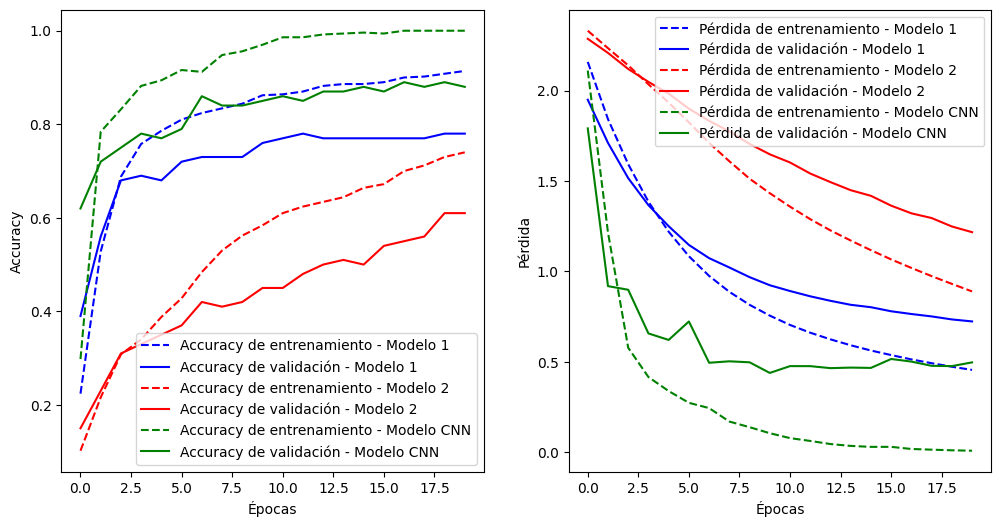

In [10]:
# Imprimir las métricas
print(f'Accuracy del Modelo 1 en el Conjunto de Pruebas: {accuracy1}')
print(f'Pérdida del Modelo 1 en el Conjunto de Pruebas: {loss1}\n')
print(f'Accuracy del Modelo 2 en el Conjunto de Pruebas: {accuracy2}')
print(f'Pérdida del Modelo 2 en el Conjunto de Pruebas: {loss2}\n')
print(f'Accuracy del Modelo CNN en el Conjunto de Pruebas: {accuracy_cnn}')
print(f'Pérdida del Modelo CNN en el Conjunto de Pruebas: {loss_cnn}\n')

print(f'Tiempo de Ejecución del Modelo 1: {execution_time1} segundos')
print(f'Tiempo de Ejecución del Modelo 2: {execution_time2} segundos')
print(f'Tiempo de Ejecución del Modelo CNN: {execution_time_cnn} segundos')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], c='b', linestyle='--', label='Accuracy de entrenamiento - Modelo 1')
plt.plot(history1.history['val_accuracy'], c='b', label='Accuracy de validación - Modelo 1')
plt.plot(history2.history['accuracy'], c='r', linestyle='--', label='Accuracy de entrenamiento - Modelo 2')
plt.plot(history2.history['val_accuracy'], c='r', label='Accuracy de validación - Modelo 2')
plt.plot(history_cnn.history['accuracy'], c='g', linestyle='--', label='Accuracy de entrenamiento - Modelo CNN')
plt.plot(history_cnn.history['val_accuracy'], c='g', label='Accuracy de validación - Modelo CNN')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], c='b', linestyle='--', label='Pérdida de entrenamiento - Modelo 1')
plt.plot(history1.history['val_loss'], c='b', label='Pérdida de validación - Modelo 1')
plt.plot(history2.history['loss'], c='r', linestyle='--', label='Pérdida de entrenamiento - Modelo 2')
plt.plot(history2.history['val_loss'], c='r', label='Pérdida de validación - Modelo 2')
plt.plot(history_cnn.history['loss'], c='g', linestyle='--', label='Pérdida de entrenamiento - Modelo CNN')
plt.plot(history_cnn.history['val_loss'], c='g', label='Pérdida de validación - Modelo CNN')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

## 🏋🏻 Ejercicio
Para comprender mejor la estructura de una red convolucional. Utiliza la CNN del ejemplo para crear una nueva que utilice una capa de convolución con 128 filtros y otra de max pooling adicionales.

Epoch 1/20
8/8 [==============================] - 1s 48ms/step - loss: 2.2018 - accuracy: 0.3180 - val_loss: 2.0446 - val_accuracy: 0.5400
Epoch 2/20
8/8 [==============================] - 0s 22ms/step - loss: 1.6651 - accuracy: 0.6100 - val_loss: 1.3099 - val_accuracy: 0.6800
Epoch 3/20
8/8 [==============================] - 0s 23ms/step - loss: 0.9010 - accuracy: 0.8100 - val_loss: 0.9721 - val_accuracy: 0.7400
Epoch 4/20
8/8 [==============================] - 0s 22ms/step - loss: 0.5416 - accuracy: 0.8480 - val_loss: 0.7710 - val_accuracy: 0.7900
Epoch 5/20
8/8 [==============================] - 0s 22ms/step - loss: 0.4387 - accuracy: 0.8680 - val_loss: 0.6396 - val_accuracy: 0.8500
Epoch 6/20
8/8 [==============================] - 0s 21ms/step - loss: 0.3750 - accuracy: 0.8960 - val_loss: 0.7697 - val_accuracy: 0.7600
Epoch 7/20
8/8 [==============================] - 0s 21ms/step - loss: 0.3104 - accuracy: 0.9040 - val_loss: 0.5282 - val_accuracy: 0.8200
Epoch 8/20
8/8 [===========

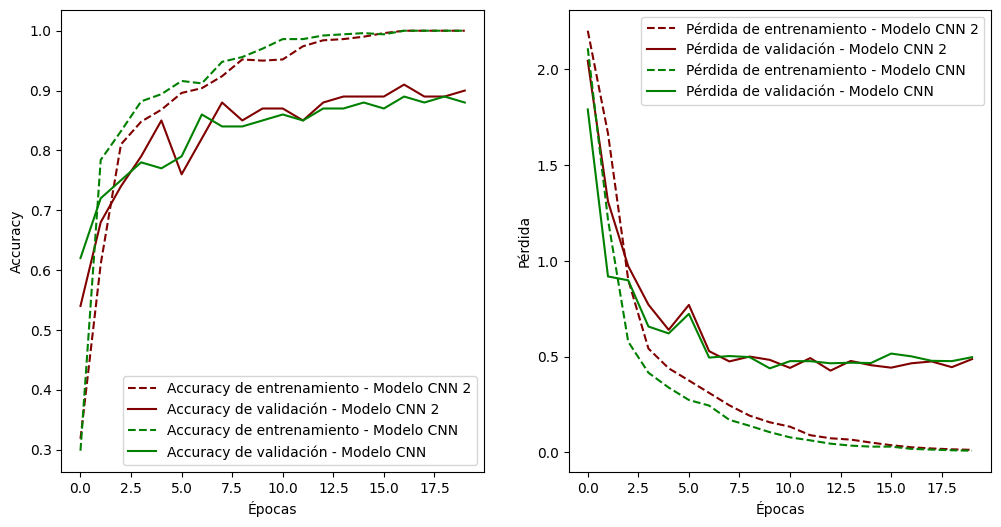

In [11]:
# Puedes realizar el ejercicio aquí
model_cnn2 = Sequential()
# Convoluciones
model_cnn2.add(Input(shape=(28, 28, 1))) # Dimensión de la entrada
model_cnn2.add(Conv2D(filters=32, kernel_size=3, activation="relu")) # Convoluciones con 32 filtros de tamaño 3x3
model_cnn2.add(MaxPooling2D(pool_size=2)) # Mantenemos el valor más alto (max pooling) escogiendo en cuadrados de 2x2 (pool_size)
model_cnn2.add(Conv2D(filters=64, kernel_size=3, activation="relu")) # Convoluciones con 64 filtros de tamaño 3x3
# Agregamos el MaxPooling y la Convolución
model_cnn2.add(MaxPooling2D(pool_size=2)) # Mantenemos el valor más alto (max pooling) escogiendo en cuadrados de 2x2 (pool_size)
model_cnn2.add(Conv2D(filters=128, kernel_size=3, activation="relu")) # Convoluciones con 128 filtros de tamaño 3x3
model_cnn2.add(Flatten())
# Clasificación
model_cnn2.add(Dense(10, activation="softmax")) # Activación softmax porque estamos clasificando multiclases
# Train
model_cnn2.compile(optimizer="adam",
 loss="categorical_crossentropy",
 metrics=["accuracy"])
history_cnn2 = model_cnn2.fit(train_images,
 train_labels,
epochs=20,
 batch_size=64,
validation_data=(validation_images, validation_labels)
 )
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_cnn2.history['accuracy'], c='maroon', linestyle='--'
, label='Accuracy de entrenamiento - Modelo CNN 2')
plt.plot(history_cnn2.history['val_accuracy'], c='maroon', label='Accuracy de validación - Modelo CNN 2')
plt.plot(history_cnn.history['accuracy'], c='g', linestyle='--'
, label='Accuracy de entrenamiento - Modelo CNN')
plt.plot(history_cnn.history['val_accuracy'], c='g', label='Accuracy de validación - Modelo CNN')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_cnn2.history['loss'], c='maroon', linestyle='--'
, label='Pérdida de entrenamiento - Modelo CNN 2')
plt.plot(history_cnn2.history['val_loss'], c='maroon', label='Pérdida de validación - Modelo CNN 2')
plt.plot(history_cnn.history['loss'], c='g', linestyle='--'
, label='Pérdida de entrenamiento - Modelo CNN')
plt.plot(history_cnn.history['val_loss'], c='g', label='Pérdida de validación - Modelo CNN')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

## Predicciones en Test
Como disponemos de un conjunto de test, podemos ver qué tal clasifica instancias nuevas el modelo así como observar algunos de los fallos que obtiene.

In [12]:
# Predecir la etiqueta con imágenes de test
test_pred = model_cnn.predict(test_images)
# Seleccionar la mayor posibilidad con "np.argmax()", y, convertir en índice con "axis=1"
test_pred_classes = np.argmax(test_pred, axis=1)
test_pred_classes

16/16 [==============================] - 0s 5ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 2, 9, 0, 6, 9, 0, 1, 5, 9, 7, 2, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 2, 0, 4, 1, 9, 7, 7, 8, 9, 3, 7, 9,
       7, 4, 3, 0, 7, 0, 2, 7, 1, 7, 3, 2, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 8, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 6, 7, 6, 7, 9, 2, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 7, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 3, 0, 1, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 7, 9, 3, 9, 0, 3, 5, 7, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 5, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 9,
       8, 7, 2, 5, 0, 6, 4, 2, 9, 1, 9, 5, 7, 7, 2, 1, 2, 6, 8, 5, 7, 7,
       9, 1, 6, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 4, 2, 9, 2, 0, 9, 0, 0, 2, 8, 6,

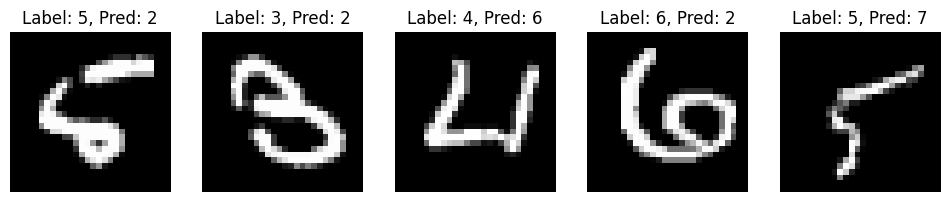

In [13]:
plt.figure(figsize=(12, 3))

displayed = 0
for i in range(len(test_pred_classes)):
    if test_labels[i][test_pred_classes[i]] == 0:
        plt.subplot(1, 5, displayed + 1)
        plt.imshow(test_images[i], cmap='gray')
        for j in range(10):
            if (test_labels[i][j] > 0):
                plt.title(f"Label: {j}, Pred: {test_pred_classes[i]}")
                break
        plt.axis('off')
        displayed = displayed + 1
    if (displayed == 5):
        break

plt.show()

# Técnicas para reducir el Overfitting
Podemos aplicar las técnicas de Dropout o Regularización de pesos a las redes convolucionales de igual forma que a las redes neuronales simples. Sin embargo, al trabajar con imágenes, es común aplicar alguna técnica de Data Augmentation para simular una mayor cantidad de instancias al entrenar y así reducir el sobreajuste.

Data Augmentation realiza transformaciones de zoom, rotación, o volteo en las imágenes con las que entrena el modelo para que este no entrene dos veces con la misma imagen, y así, simular una mayor cantidad de instancias.

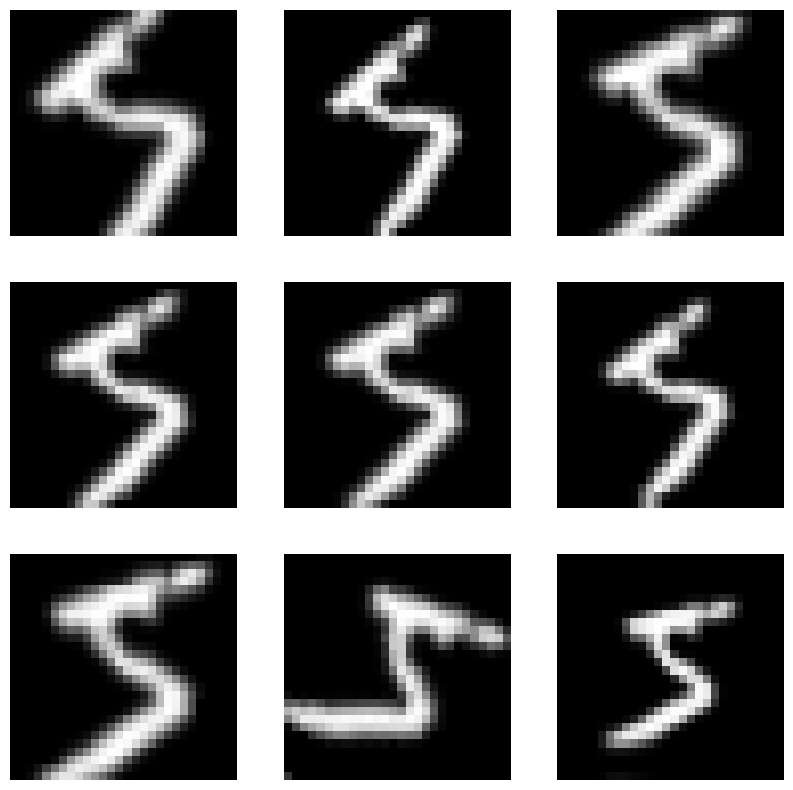

In [14]:
# Se definen las operaciones permitidas, y sus parámetros, como las primeras capas del modelo.
data_augmentation = Sequential()

#data_augmentation.add(layers.RandomFlip("horizontal")) # 50% posibilidad de voltear la imagen # No queremos volteo con los números
data_augmentation.add(layers.RandomRotation(0.1)) # Rotación de como máximo un 10% en sentido horario o antihorario (reotación de 36º)
data_augmentation.add(layers.RandomZoom(0.2)) # Hace un zoom a la imagen en un factor de +-20%

# Visualizar el data augmentation con una imagen de ejemplo
plt.figure(figsize=(10, 10))
image = train_images[0]
for i in range(9):
    augmented_image = data_augmentation(image)
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image, cmap='gray')
    plt.axis("off")
plt.show()

## 🏋🏻 Ejercicio
Además del data augmentation, agrega alguna capa de `Dropout` y aplica regularización de pesos a alguna de las capas. Después, visualiza el entrenamiento para compararlo con los modelos que se sobreajustaban.

Epoch 1/20
8/8 [==============================] - 2s 60ms/step - loss: 2.4390 - accuracy: 0.1260 - val_loss: 2.3530 - val_accuracy: 0.3400
Epoch 2/20
8/8 [==============================] - 0s 32ms/step - loss: 2.2742 - accuracy: 0.3640 - val_loss: 2.0759 - val_accuracy: 0.4800
Epoch 3/20
8/8 [==============================] - 0s 28ms/step - loss: 1.9476 - accuracy: 0.4340 - val_loss: 1.5209 - val_accuracy: 0.6400
Epoch 4/20
8/8 [==============================] - 0s 30ms/step - loss: 1.5493 - accuracy: 0.5420 - val_loss: 1.0796 - val_accuracy: 0.7600
Epoch 5/20
8/8 [==============================] - 0s 29ms/step - loss: 1.2740 - accuracy: 0.6380 - val_loss: 0.9937 - val_accuracy: 0.7300
Epoch 6/20
8/8 [==============================] - 0s 29ms/step - loss: 1.1948 - accuracy: 0.6440 - val_loss: 0.8677 - val_accuracy: 0.7700
Epoch 7/20
8/8 [==============================] - 0s 30ms/step - loss: 1.0290 - accuracy: 0.6920 - val_loss: 0.8258 - val_accuracy: 0.8000
Epoch 8/20
8/8 [===========

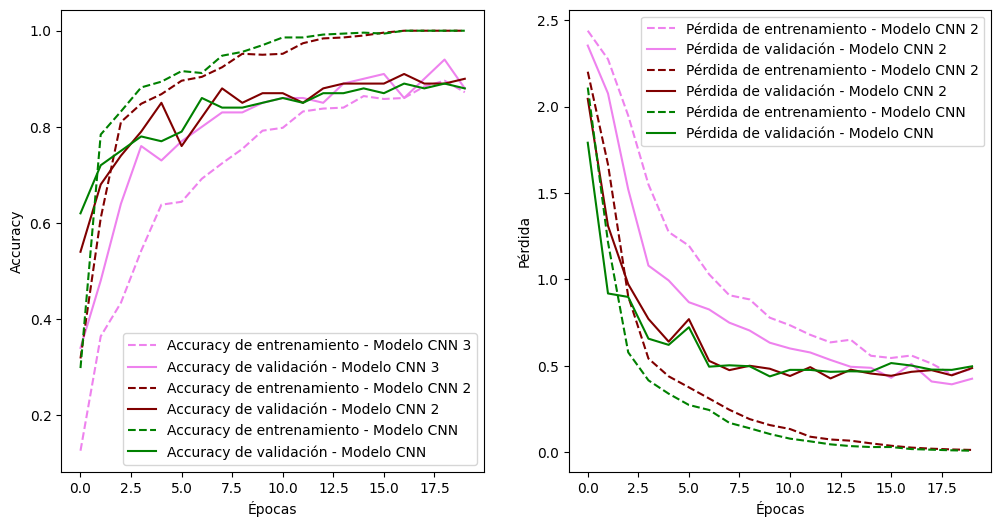

In [15]:
# Puedes realizar el ejercicio aquí
# Puedes realizar el ejercicio aquí
model_cnn3 = Sequential()
# Data Augmentation
model_cnn3.add(layers.RandomRotation(0.1)) # Rotación de como máximo un 10% en sentido horario o antihorario (reotación de 36º)
model_cnn3.add(layers.RandomZoom(0.2)) # Hace un zoom a la imagen en un factor de +-20%
# Convoluciones
model_cnn3.add(Input(shape=(28, 28, 1))) # Dimensión de la entrada
model_cnn3.add(Conv2D(filters=32, kernel_size=3, activation="relu")) # Convoluciones con 32 filtros de tamaño 3x3
model_cnn3.add(MaxPooling2D(pool_size=2)) # Mantenemos el valor más alto (max pooling) escogiendo en cuadrados de 2x2 (pool_size)
model_cnn3.add(Conv2D(filters=64, kernel_size=3, activation="relu")) # Convoluciones con 64 filtros de tamaño 3x3
model_cnn3.add(MaxPooling2D(pool_size=2))
model_cnn3.add(Conv2D(filters=128,
 kernel_size=3,
activation="relu",
kernel_regularizer=regularizers.l2(0.002)))
model_cnn3.add(layers.Dropout(0.5))
model_cnn3.add(Flatten())
# Clasificación
model_cnn3.add(Dense(10, activation="softmax")) # Activación softmax porque estamos clasificando multiclases
# Train
model_cnn3.compile(optimizer="adam",
 loss="categorical_crossentropy",
 metrics=["accuracy"])
history_cnn3 = model_cnn3.fit(train_images,
 train_labels,
 epochs=20,
batch_size=64,
validation_data=(validation_images, validation_labels)
 )
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_cnn3.history['accuracy'], c='violet', linestyle='--'
, label='Accuracy de entrenamiento - Modelo CNN 3')
plt.plot(history_cnn3.history['val_accuracy'], c='violet', label='Accuracy de validación - Modelo CNN 3')
plt.plot(history_cnn2.history['accuracy'], c='maroon', linestyle='--'
, label='Accuracy de entrenamiento - Modelo CNN 2')
plt.plot(history_cnn2.history['val_accuracy'], c='maroon', label='Accuracy de validación - Modelo CNN 2')
plt.plot(history_cnn.history['accuracy'], c='g', linestyle='--'
, label='Accuracy de entrenamiento - Modelo CNN')
plt.plot(history_cnn.history['val_accuracy'], c='g', label='Accuracy de validación - Modelo CNN')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_cnn3.history['loss'], c='violet', linestyle='--'
, label='Pérdida de entrenamiento - Modelo CNN 2')
plt.plot(history_cnn3.history['val_loss'], c='violet', label='Pérdida de validación - Modelo CNN 2')
plt.plot(history_cnn2.history['loss'], c='maroon', linestyle='--'
, label='Pérdida de entrenamiento - Modelo CNN 2')
plt.plot(history_cnn2.history['val_loss'], c='maroon', label='Pérdida de validación - Modelo CNN 2')
plt.plot(history_cnn.history['loss'], c='g', linestyle='--'
, label='Pérdida de entrenamiento - Modelo CNN')
plt.plot(history_cnn.history['val_loss'], c='g', label='Pérdida de validación - Modelo CNN')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


## Stride y Padding
Keras nos permite también modificar el Stride y Padding que sigue la red. Hasta el momento no hemos aplicado ningún tipo de padding y el stride usado ha sido el de por defecto de 1.

In [16]:
Conv2D(filters=32, 
        kernel_size=3, 
        activation="relu",
        strides=(1, 1), # Por defecto un paso de 1 en cada dirección, a mayor paso, menor dimensión en la salida de la convolución.
        padding="valid", # Por defecto 'valid' (sin padding, solamente se seleccionan casillas válidas),
                         # 'same' (mismas casillas con padding en todas las direcciones: dimensión de entrada y salida igual si strides = (1, 1))
    )

# Clasificación con otros datos
Para este ejercicio se van a utilizar los datos de la competición dogs vs cats de kaggle (https://www.kaggle.com/competitions/dogs-vs-cats/overview). El objetivo de la competición es crear un algoritmo capaz de clasificar correctamente imágenes de gatos y perros. Para descargar los archivos es necesario tener una cuenta en Kaggle. En el campus virtual se encuentra además dos selecciones reducidas de algunas de las imágenes de la competición.

Para poder leer, interpretar, y visualizar las imágenes requerimos de unos pasos:
1. Leer los ficheros de imágenes
2. Decodificar el formato JPEG a filas de datos en formato RGB
3. Convertir esos datos en tensores con formato de coma flotante
4. Igualar el tamaño de todas las imágenes para que la entrada de la red sea idéntica (estableceremos una de 180 x 180)

Por suerte, Keras nos simplifica estos pasos con la función `image_dataset_from_directory`

In [18]:
# Borrar directorios antiguos y sus contenidos (por si acaso hemos modificado las imágenes o eliminado algunos)
# Para asegurarnos "borrón y cuenta nueva"
import os
os.system("rm -rf DogsVsCats")

# Descomprimir archivo .zip
import shutil
shutil.unpack_archive("DogsVsCats.zip", "DogsVsCats", "zip")

# Cargamos los datos de la memoria según se necesiten, con una dimensión de 180 x 180, en lotes de 32 imágenes
# Debido al formato de ficheros, las imágenes ya incluyen la etiqueta de la clase a la que pertenecen
train_dataset = image_dataset_from_directory(
     "DogsVsCats/train",
     image_size=(180, 180),
     batch_size=32)
validation_dataset = image_dataset_from_directory(
     "DogsVsCats/validation",
     image_size=(180, 180),
     batch_size=32)
test_dataset = image_dataset_from_directory(
     "DogsVsCats/test",
     image_size=(180, 180),
     batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


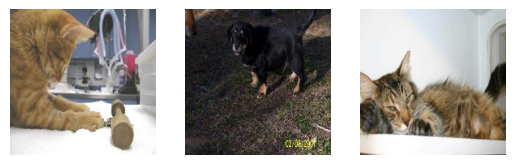

In [21]:
# Visualizamos algunas de las imágenes
i = 1
for images, _ in train_dataset.take(1): # Cogemos un batch (32 imágenes)
    for image in images: # Iteramos el batch e imprimimos 3 imágenes
        plt.subplot(1, 3, i)
        plt.imshow(image.numpy().astype("uint8"))
        plt.axis('off')
        i = i + 1 
        if (i == 4):
            break

## 🏋🏻 Ejercicio
Realiza una red neuronal capaz de clasificar imágenes utilizando el conjunto de datos de gatos y perros. Aplica las técnicas vistas para evitar el sobreajuste cuando sea necesario. A las imágenes no les hemos aplicado ningún reescalado, podemos agregar una capa de `Rescaling` tras la capa inicial de `Input`, es decir:

`model.add(Input(shape=(180, 180, 3)))`

`model.add(Rescaling(1./255))`

In [22]:
# Puedes realizar el ejercicio aquí
keras.utils.set_random_seed(2)
model = Sequential()

# Data Augmentation
model.add(layers.RandomFlip("horizontal")) # 50% posibilidad de voltear la imagen
model.add(layers.RandomRotation(0.1)) # Rotación de como máximo un 10% en sentido horario o antihorario (reotación de 36º)
model.add(layers.RandomZoom(0.2)) # Hace un zoom a la imagen en un factor de +-20%
model.add(Input(shape=(180, 180, 3))) # Dimensión de la entrada
model.add(layers.Rescaling(1./255))

# Convoluciones
# Mayor tamaño de agrupación para reducir la dimensión de la imagen y que el entrenamiento sea más rápido, a coste de, posiblemente, un peor modelo
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=3))
model.add(layers.Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=3))
model.add(layers.Dropout(0.5))
model.add(Flatten())

# Clasificación
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam",
 loss="binary_crossentropy",
 metrics=["accuracy"])

# Train
history = model.fit(train_dataset,
 epochs=20,
 validation_data=validation_dataset
 )
loss, accuracy = model.evaluate(test_dataset, verbose=0)

Epoch 1/20
63/63 [==============================] - 24s 346ms/step - loss: 0.6949 - accuracy: 0.4940 - val_loss: 0.6895 - val_accuracy: 0.5590
Epoch 2/20
63/63 [==============================] - 21s 327ms/step - loss: 0.6931 - accuracy: 0.5360 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
63/63 [==============================] - 20s 323ms/step - loss: 0.6903 - accuracy: 0.5230 - val_loss: 0.6828 - val_accuracy: 0.6030
Epoch 4/20
63/63 [==============================] - 21s 331ms/step - loss: 0.6818 - accuracy: 0.5640 - val_loss: 0.6686 - val_accuracy: 0.5900
Epoch 5/20
63/63 [==============================] - 21s 328ms/step - loss: 0.6598 - accuracy: 0.6055 - val_loss: 0.6387 - val_accuracy: 0.6560
Epoch 6/20
63/63 [==============================] - 20s 324ms/step - loss: 0.6557 - accuracy: 0.6205 - val_loss: 0.6296 - val_accuracy: 0.6730
Epoch 7/20
63/63 [==============================] - 20s 324ms/step - loss: 0.6391 - accuracy: 0.6415 - val_loss: 0.6274 - val_accuracy: 0.6470

Accuracy del Modelo en el Conjunto de Pruebas: 0.7195000052452087
Pérdida del Modelo en el Conjunto de Pruebas: 0.5668057203292847



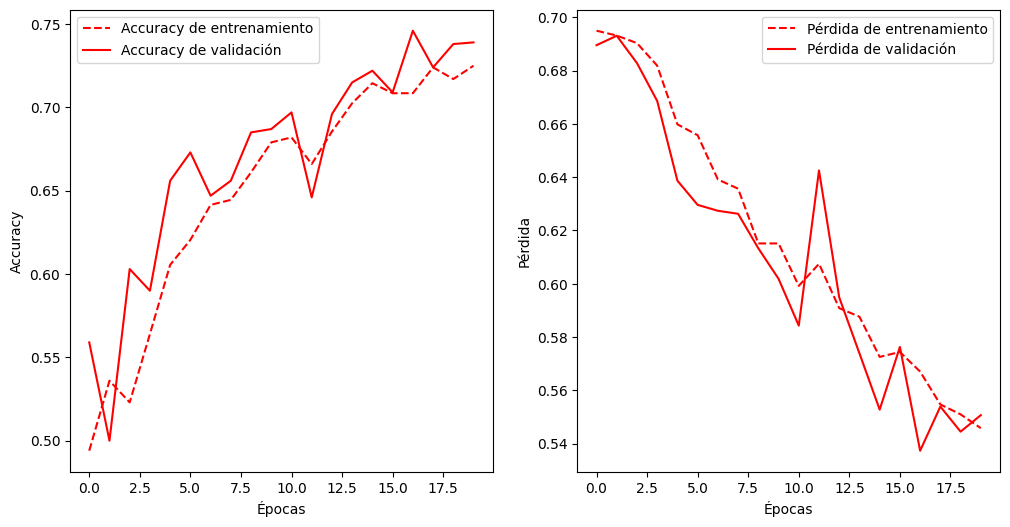

In [23]:
print(f'Accuracy del Modelo en el Conjunto de Pruebas: {accuracy}')
print(f'Pérdida del Modelo en el Conjunto de Pruebas: {loss}\n')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], c='r', linestyle='--'
, label='Accuracy de entrenamiento')
plt.plot(history.history['val_accuracy'], c='r', label='Accuracy de validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], c='r', linestyle='--'
, label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], c='r', label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()